In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math

In [2]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------ --------------------------- 2.9/9.6 MB 15.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.6 MB 14.2 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 8.6 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 8.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 7.4 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 6.5 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.0 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import statsmodels.api as sm

In [3]:
data = pd.read_csv(r"C:\Users\sindhuja\Downloads\archive (1)\AirPassengers.csv")
print("Columns in dataset:", data.columns.tolist())

Columns in dataset: ['Month', '#Passengers']


In [4]:
data.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [5]:
if '#Passengers' in data.columns:
    data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [6]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)
data.index.name = 'Date'

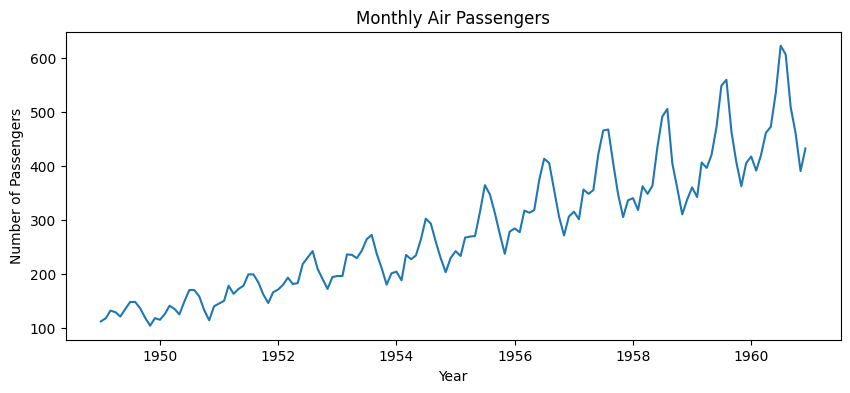

In [7]:
plt.figure(figsize=(10,4))
plt.plot(data['Passengers'])
plt.title("Monthly Air Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

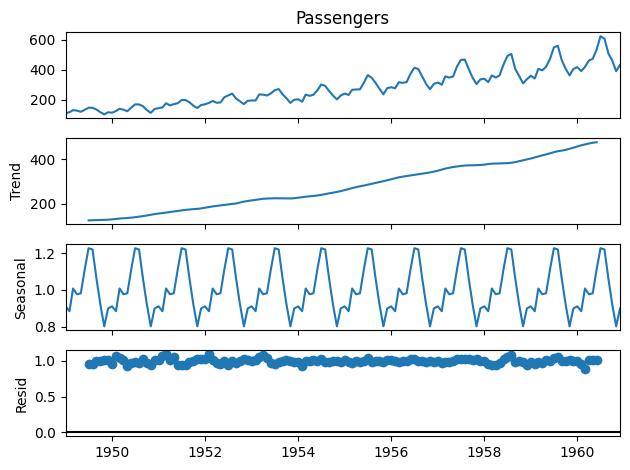

In [8]:
decomp = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decomp.plot()
plt.show()

train-test split

In [10]:
train = data['Passengers'][:-12]
test = data['Passengers'][-12:]

In [11]:
model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit(disp=False)

C:\Users\sindhuja\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sindhuja\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sindhuja\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sindhuja\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

In [12]:
forecast = result.get_forecast(steps=12)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

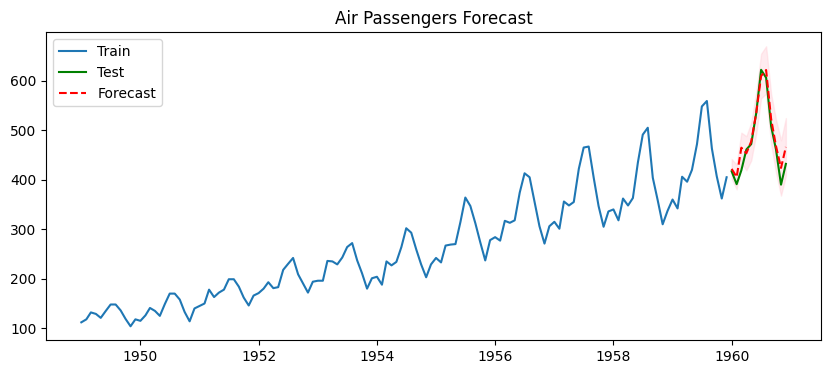

In [13]:
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(pred, label='Forecast', color='red', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title("Air Passengers Forecast")
plt.legend()
plt.show()